<h1 style="font-size:40px;"><center>Exercise II:<br> Model selection with MLPs
</center></h1>


# Short summary
In this exercise you will: 

* train MLPs and for both classification and regression problems and perform model selection to optimize validation performance

There are 10 questions in this exercise. These 10 questions can be found in five different cells below (see section "The Different Cells"). All of the exercises deal with training and evaluation of the multi-layer perceptron (MLP) network. You are going to work with different datasets, binary and multiple classification problems and a regression problem. For questions 1-6, code is available that you can run directly or only need to make small modifications to. For questions 7-10 we only provide parts of the code and you should add the rest. However, it is typically just a matter of paste and copy from the previous code cells (in a proper way).

You should write the report of the exercise within this notebook. The details of how to do that can be found below in section "Writing the report". Finally before you start:

**Deadline for submitting the report: December 10, 13:00 (2021)**

## The data
There are several datasets in this exercise. 

### syn2
The *syn2* dataset represents a binary classification problem. The input data is 2D which allows for an easy visual inspection of the different classes and the decision boundary implemented by the network. The dataset is generated "on the fly" each time. Data are generated from various normal distributions. Since they are generated using random numbers it means that each time you generate the data it will be slightly different from next time. You can control this by having a fixed *seed* to the random number generator. The cell "PlotData" will plot the *syn2* dataset.

Note: This is the same dataset as in exercise 1.

### regr2
There is also a synthetic regression problem, called *regr2*. It has 6 inputs (independent variables) and one output variable (dependent variable). It is generated according to the following formula:  

$\qquad d = 2x_1 + x_2x_3^2 + e^{x_4} + 5x_5x_6 + 3\sin(2\pi x_6) + \alpha\epsilon$  
    
where $\epsilon$ is added normally distributed noise and $\alpha$ is a parameter controlling the size of the added noise. Variables $x_1,...,x_4$ are normally distrubuted with zero mean and unit variance, whereas $x_5, x_6$ are uniformly distributed ($[0,1]$). The target value $d$ has a non-linear dependence on ***x***.

### Spiral data
This is the "famous" spiral dataset that consists of two 2-D spirals, one for each class. The perfect classification boundary is also a spiral. The cell "PlotData" will plot this dataset.

### Japanese vowels dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels* In short, nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, a discrete times series was produced where each time point consists of 12 (LPC cepstrum) coefficients. The length of each time series was between 7-29. 
Here we treat each point of the time series as a feature (12 inputs). In total we have 9961
data points which then has been divided into 4274 for training, 2275 for validation and 3412 for test. The original data files are provided as *ae.train* and *ae.test*. The task is now based on a single sample value of one of the speakers, determine which speaker it was. This is, in summary, a 9-class classification problem with 12 input values for each case.

### Bioconcentration dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/QSAR+Bioconcentration+classes+dataset* In short, this is a dataset of manually-curated bioconcentration factors (BCF) for 779 chemicals used to determine the mechanisms of bioconcentration, i.e. to predict whether a chemical: (1) is mainly stored within lipid tissues, (2) has additional storage sites (e.g. proteins), or (3) is metabolized/eliminated. Data were randomly split into a training set of 584 compounds (75%) and a test set of 195 compounds (25%), preserving the proportion between the classes. The independent variables consist of 9 molecular descriptors. This is, in summary, a 3-class classification problem with 9 input values for each case.

## The questions
There are 10 questions, where the first 3 questions are dealing with 2D binary classification problems. Here you will be able to see the boundary implemented by the different MLPs that you train. Questions 4-6 deals with training a regression network for the *regr2* dataset. Question 7-8 deals with Japanese vowels classification problem, here your task is to come up with a model that optimizes the validation result. Question 9 is for the Bioconcentration dataset, and again you should come up with a good model. Finally, the last question is to find a model that can solve the spiral problem.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | MLP | Needed | Defines the MLP model |
| 3 | Data | Needed | Defines the functions to generate the artificial datasets |
| 4 | PlotData | Information | Plots the 2D classification datasets |
| 5 | Statistics | Needed | Defines the functions that calculates various performance measures |
| 6 | Boundary | Needed | Function that can show 2D classification boundaries | 
| 7 | Confusion | Needed | Functions that plots the confusion matrix | 
| 8 | Ex1 | Exercise | For question 1-3 |
| 9 | Ex2 | Exercise | For question 4-6 |
| 10 | Ex3 | Exercise | For question 7-8 |
| 11 | Ex4 | Exercise | For question 9 |
| 12 | Ex5 | Exercise | For question 10 |

In order for you to start with the exercise you need to run all cells with the celltype "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" or "Run all above" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun!

---

### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries

In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import metrics, regularizers, optimizers
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import scipy as sp
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, log_loss, classification_report
import pandas as pd

### CellName: MLP (#2)
### CellType: Needed
### Cell instruction: Defining the MLP model

This cell defines the MLP model. There are a number of parameters that is needed to 
define a model. Here is a list of them: 


* inp_dim: the input dimension (integer)

* n_nod: size of the network, eg [5] for a one hidden layer with 5 nodes and [5,3] for a two layer network with 5 and 3 hidden nodes each.

* drop_nod: Dropout parameter for each hidden layer. You can specipty a single number that will be used for all hidden layers. If you want different dropout parameters for each hidden layer, then specify as a list. Example, for a two hidden layer network drop_nod = [0.5, 0.75] means drop hidden nodes with probability 0.5 and 0.75 for the first and the second hidden layer, respectively. Note that we do not use dropout on the input nodes! Also, a value of 0 means no dropout (i.e. zero probability of removing a node).

* act_fun: the activation function. Most common are
    * 'linear'
    * 'relu'
    * 'tanh'
    * 'sigmoid'
        
* out_act_fun: the activation function for the output nodes. Most common are
    * 'linear'
    * 'sigmoid'
    * 'softmax'
    
* opt_method: The error minimization method. Common choices
    * 'SGD'
    * 'Adam'
    * 'Nadam'
    * 'RMSprop'
    
* cost_fun: The error function used during training. There are three common ones
    * 'mean_squared_error'
    * 'binary_crossentropy'
    * 'categorical_crossentropy'

* lr_rate: The learning rate. 

* metric: The metric to use besides the loss. Common values
    * accuracy
    * mse

* lambd: L2 regularization parameter

* num_out: The number of output nodes

Run the cell by entering into the cell and press "CTRL Enter".

In [3]:
def mlp(inp_dim,
            n_nod,
            drop_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            metric = 'accuracy',
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for i, nod in enumerate(n_nod):
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        if type(drop_nod) is list: 
            X = Dropout(drop_nod[i])(X)
        else: 
            X = Dropout(drop_nod)(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(lr = lr_rate),
                  loss = cost_fun,
                  metrics=[metric])       
    
    return model



### CellName: Data (#3)
### CellType: Needed
### Cell instruction: Defining synthetic data sets

This cell defines the different synthetic data sets. It also provides functions for reading the Vowles dataset, the Bioconcentration dataset and the Spiral data. The last function is used for standardization of the data. 

Run the cell by entering into the cell and press "CTRL Enter".

In [4]:
def syn2(N):
    
    global seed
     
    x = np.empty(shape=(N,2), dtype = np.float32)  
    d = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)

    # Positive samples
    x[:N1,:] = 0.8 + np.random.normal(loc=.0, scale=1., size=(N1,2))

    # Negative samples 
    x[N1:,:] = -.8 + np.random.normal(loc=.0, scale=1., size=(N-N1,2))
    
    # Target
    d[:N1] = np.ones(shape=(N1,))
    d[N1:] = np.zeros(shape=(N-N1,))

    return x,d


def regr2(N, v=0):

    global seed

    x = np.empty(shape=(N,6), dtype = np.float32)  
    
    uni = lambda n : np.random.uniform(0,1,n)
    norm = lambda n : np.random.normal(0,1,n)
    noise =  lambda  n : np.random.normal(0,1,n)
    
    
    for i in range(4):
        x[:,i] = norm(N)
    for j in [4,5]:
        x[:,j] = uni(N)
    
    d =   2*x[:,0] + x[:,1]* x[:,2]**2 + np.exp(x[:,3]) + \
            5*x[:,4]*x[:,5]  + 3*np.sin(2*np.pi*x[:,5])
    std_signal = np.std(d)
    d = d + v * std_signal * noise(N)
        
    return x, d

def twospirals(n_points, turns = 3, noise=0.5):
    """
     Returns the two spirals dataset.
    """
    n = (np.random.rand(n_points,1)*0.95+0.05) * turns * (2*np.pi)
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

def vowels():
    
    def pre_proc(file_name):
        block = []
        x = []
    
        with open(file_name) as file:
            for line in file:    
                if line.strip():
                    numbers = [float(n) for n in line.split()]
                    block.append(numbers)
                else:
                    x.append(block)
                    block = []
                
        ################################
        x = [np.asarray(ar) for ar in x]    
        return x

    x_trn = pre_proc('ae.train')
    x_tst = pre_proc('ae.test')

    
    ############## LABELS###########
    chunk1 = list(range(30,270, 30))
    d_trn = []
    person = 0

    for i, block in enumerate(x_trn):
        if i in chunk1:
            person += 1
        d_trn.extend([person]*block.shape[0])
        
    chunk2 = [31,35,88,44,29,24,40,50,29]
    chunk2 = np.cumsum(chunk2)
    d_tst = []
    person = 0
    for i, block in enumerate(x_tst):
        if i in chunk2:
            person += 1
        d_tst.extend([person]*block.shape[0])

    x_trn = np.vstack(x_trn)
    x_tst = np.vstack(x_tst)
    
    ## Split into train, validation and test
    num_classes = 9
    d_trn = keras.utils.to_categorical(d_trn, num_classes)
    d_tst = keras.utils.to_categorical(d_tst, num_classes)

    from sklearn.model_selection import train_test_split
    x_tst, x_val, d_tst, d_val = train_test_split(x_tst, d_tst, test_size=0.4, random_state=41)

    return x_trn, d_trn, x_val, d_val, x_tst, d_tst

def bcf():

    bcf_trn = pd.read_csv("Grisoni_trn.csv", delimiter='\t')
    bcf_tst = pd.read_csv("Grisoni_tst.csv", delimiter='\t')

    x_trn = bcf_trn.iloc[:,3:12].values.astype(np.float32)
    d_trn = bcf_trn.iloc[:,12].values.astype(np.float32) - 1.0
    d_trn = keras.utils.to_categorical(d_trn, 3)

    x_tst = bcf_tst.iloc[:,3:12].values.astype(np.float32)
    d_tst = bcf_tst.iloc[:,12].values.astype(np.float32) - 1.0
    d_tst = keras.utils.to_categorical(d_tst, 3)
    
    return x_trn, d_trn, x_tst, d_tst

def standard(x):
    return np.mean(x, axis=0) , np.std(x, axis=0)
    

### CellName: PlotData (#4)
### CellType: Information
### Cell instruction: Plotting the data

Here we just generate 100 cases for syn2 and the spiral dataset and plot them. 

Run the cell by entering into the cell and press "CTRL Enter". 

**Note!** This cell is not needed for the actual exercises, it is just to visualize the four different 2D synthetic classification data sets.

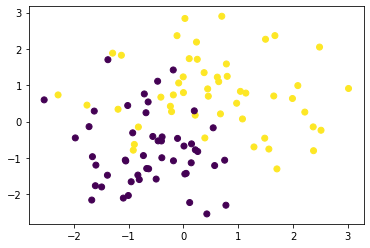

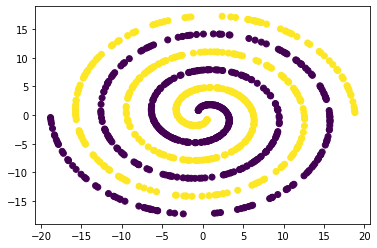

In [5]:
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

x,d = syn2(100)
plt.figure(2)
plt.scatter(x[:,0],x[:,1], c=d)

x,d = twospirals(500, 3, 0)
plt.figure(4)
plt.scatter(x[:,0],x[:,1], c=d)


### CellName: Statistics (#5)
### CellType: Needed
### Cell instruction: Present result for both classification and regression problems

This cell defines two functions that we are going to call using a trained model to calculate both error and performance measures. 

Run the cell by entering into the cell and press "CTRL Enter".

In [6]:
def stats_class(x = None, y = None, label = 'Training', modl = None):
    """
    input :  
             x = input
             y = output
             label = "Provided text string"
             modl = the model
             
    output : 
             sensitivity = fraction of correctly classified positive cases
             specificity = fraction of correctly classified negative cases
             accuracy = fraction of correctly classified cases
             loss = typically the cross-entropy error
    """
    
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    sens = tp / nof_p
    spec = tn / nof_n
    acc = (tp + tn) / (len(y))
    loss = modl.evaluate(x, y , batch_size =  x.shape[0], verbose=0)
                
    A = ['Accuracy', 'Sensitivity', 'Specificity', 'Loss']
    B = [acc, sens, spec, loss[0]]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.4f}'.format(A[i], B[i]))

    return print('\n','#'*50)

def stats_reg(d = None, d_pred = None, label = 'Training', estimat = None):
    
    A = ['MSE', 'CorrCoeff']
    
    pcorr = np.corrcoef(d, d_pred)[1,0]
    
    if label.lower() in ['training', 'trn', 'train']:
        mse = estimat.history['loss'][-1]
    else:
        mse = estimat.history['val_loss'][-1] 

    B = [mse, pcorr]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.10f}'.format(A[i], B[i]))
    print('\n','#'*50)
    return A,B


### CellName: Confusion (#6)
### CellType: Needed
### Cell Instruction: Plot the confusion matrix

This cell defines the functions need to plot a confusion matrix. A confusion matrix is a summary of the predictions made by a classifier. Each column of the matrix represents the instances of the predicted class while each row represents the instances of the actual class. The function 'plot_confusion_matrix' does the actual plotting, while the 'make_cm_plot' is the one that should be called from the user. See example of usage in the exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [7]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def make_cm_plot(model,
            inp,
            trg,
            num_classes,
            label='Test data'):
    
    print('\n','#'*10,'Result for {}'.format(label), '#'*10, '\n')

    y = model.predict(inp, verbose=0 )
    print('log_loss:   ', '{:.4f}'.format(log_loss(trg, y, eps=1e-15)))

    d_class = trg.argmax(axis=1)
    y_class = y.argmax(axis=1)
    print('accuracy:   ', '{:.4f}'.format((y_class==d_class).mean()), '\n')

    class_names = ['class {}'.format(i+1) for i in range(num_classes)]
    print(classification_report(d_class, y_class, target_names=class_names))

    confuTst = confusion_matrix(d_class, y_class)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = class_names,
                          title        = "Confusion Matrix")

    

### CellName: Boundary (#7)
### CellType: Needed
### Cell Instruction: Decision boundary

This cell defines the function to plot the decision boundary for a 2D input binary MLP classifier. 

Run the cell by entering into the cell and press "CTRL Enter".

In [8]:
def decision_b(X, Y1, model ):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # grid stepsize
    h = 0.025

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    Z[Z>.5] = 1
    Z[Z<= .5] = 0

    Y_pr = model.predict(X, batch_size = X.shape[0], verbose=0).reshape(Y1.shape)
  
    Y = np.copy(Y1)
    Y_pr[Y_pr>.5] = 1
    Y_pr[Y_pr<= .5] = 0
    Y[(Y!=Y_pr) & (Y==0)] = 2
    Y[(Y!=Y_pr) & (Y==1)] = 3
    
    
    plt.figure()
    #plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha = .9) 
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    
    plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], marker='+', c='k')
    plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], marker='o', c='k')
       
    plt.scatter(X[:, 0][Y==3], X[:, 1][Y==3], marker = '+', c='r')   
    plt.scatter(X[:, 0][Y==2], X[:, 1][Y==2], marker = 'o', c='r')
    
    
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.show()


---
End of "Needed" and "Information" cells. Below are the cells for the actual exercise.

---

### CellName: Ex1 (#8)
### CellType: Exercise
### Cell instruction: Instruction for question 1-3

The cell below should be used for questions 1-3. For question 1 you can run the cell as it is (i.e. CTRL-Return). For the other questions you need to modify the cell in order to change hyper parameters etc. 

From now on we will talk about *performance*! It can be performance of a trained model on the training dataset or the performance on the validation dataset. What do we mean by performance?  For classification problems we will provide 4 different measurements as returned by a call to the *stats_class* function. They are:
* Sensitivity = fraction of correctly classified "1" cases
* Specificity = fraction of correctly classified "0" cases
* Accuracy = fraction of correctly classified cases
* loss = cross-entropy error (so low loss means good performance!)

For the questions in this exercise, accuracy is an appropriate performance measure.

#### Question 1
Here you are going to train a classifier for the *syn2* dataset. You are also going to use a validation dataset as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation data points. 

Now, use *syn2*(100 training data points) and train a *linear* MLP to separate the two classes, i.e. use a single hidden node. **What is the performance you get on the validation dataset?** 

**Note:** Use a fixed random seed for this exercise since you will compare with runs in the next questions.

**Hint:** Remember for the first computer exercise that you should average over a few trained models.

#### Question 2
You are now going to train this model to a high training accuracy! By increasing the number of hidden nodes we should be able to get better and better training performance. **(a) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?** **(b) What is the performance on the validation data set?**

**Hint:** Remember from the first computer exercise that overtraining often means finding good local minimum of the loss function, which may require some tuning of the hyper parameters that controls the training. This means that you may have to change the learning rate, batch size and the number of epochs. Since the *Adam* method is usually better than the vanilla *stochastic gradient descent*, it is therefore used in the cells below as the default minimizer. 

#### Question 3
However, we are almost always interested in optimal validation performance. You should now find the number of hidden nodes that optimize the validation performance. **(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?** **(b) Try to give an explanation for the number you obtained?**


1. 
is hidden [1] ok? should 'act_fun': 'tanh' be linear?

this is what we get otherwise:
avg of 0.8770 0.8690 0.8740 0.8780 0.8710 = 0.8738

2.
[6]
lr = 0.1 
epochs = 400
bs = 28

b) 0.8320 0.8410 0.8370 0.8200


3. 
Using the unchanged settings, i.e. same as in 1.

a) best seems to be 5! 

2: 0.8280 0.8270 0.8270
3: 0.8360 0.8360 0.8370
4: 0.8480 0.8480 0.8410 0.8390 0.8390
5: 0.8390 0.8400 0.8390 0.8380 0.8390
6: 0.8290 0.8200 0.8220 0.8250 0.8240
7: 0.8200 0.8250 0.8150 0.8140 0.8160
8: 0.8290 0.8260 0.8180 0.8210 0.8230
9: 0.8290 0.8290 0.8250 0.8120 0.8130
10: 0.8250 0.8030 0.7990 0.7990 0.7960
15: 0.8250 0.7990 0.8010 0.7960 0.7970
20: 0.8180 0.8130 0.8030 0.8140 0.8170
25: 0.8200 0.8180 0.8230 0.8270 0.8230
30: 0.8230 0.8170 0.8130 0.8120 0.8150
35: 0.8170 0.8130 0.8050 0.8070 0.8090

b) 



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________

 ########## STATISTICS for Validation Data ########## 

Accuracy        0.8790
Sensitivity     0.8980
Specificity     0.8600
Loss            0.2904

 ##################################################
--------------------------------0----------------------------

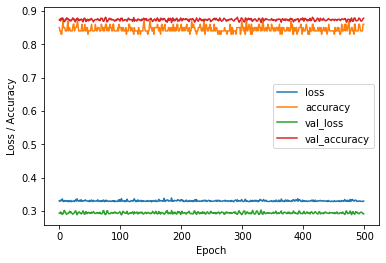

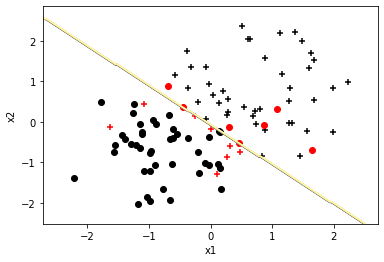

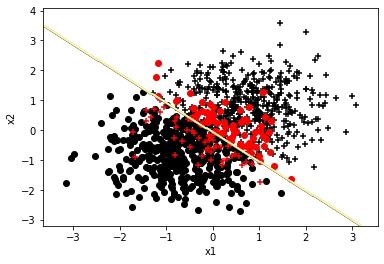

Wall time: 4min 46s


In [11]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = syn2(100)
x_val, d_val = syn2(1000)

# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [1],                      # architecture
         'drop_nod': 0.0,                   # dropout specification
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.05 ,                  # learningrate
         'num_out' : 1 }                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_ex1 = mlp(**INPUT)

# Print a summary of the model
model_ex1.summary()

# Train the model
for i in range(5): 
    estimator_ex1 = model_ex1.fit(x_trn, d_trn,
                          epochs = 500,      
                          validation_data=(x_val, d_val),
                          batch_size=25,
                          verbose = 0)

    # Call the stats function to print out statistics for classification problems
    # stats_class(x_trn, d_trn, 'Training', model_ex1)
    stats_class(x_val, d_val, 'Validation', model_ex1)
    print(f'--------------------------------{i}--------------------------------')

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Show the decision boundary for the training dataset
decision_b(x_trn, d_trn, model_ex1)

# If you uncomment this one you will see how the decsion boundary is with respect to the validation data
decision_b(x_val, d_val, model_ex1)


### CellName: Ex2 (#9)
### CellType: Exercise
### Cell instruction: Instruction for question 4-6

Now we are going to look at a regression problem. The data as described above (regr2) consists of 6 inputs (features) and one output (target) value. As for the previous exercise a new data set is generated each time you call the *regr2* function. To get exactly the same data set between different calls, use a fixed seed. For this problem we can control the amount of noise added to the target value. We are going to use a relatively small training dataset (250) and a larger validation dataset (1000) to get a more robust estimation of the generalization performance, and 0.4 units of noise. For regression problems we also need new performance measures. The *stats_reg* function will give you two such measures:
* MSE = mean squared error (low error mean good performance)
* CorrCoeff = Pearson correlation coefficient for the scatter plot between predicted and true values.

The cell below can be used as an template for all questions regarding this regression problem.

#### Question 4
*Model selection based on the number of hidden nodes (in a single hidden layer).* Find the number of hidden nodes that gives best validation performance. **How many hidden nodes do you find that gives best validation performance?** Make a note of the best validation MSE (or correlation coefficient) you get.

**Hint:** A good strategy is to start with a "small" model and increase the number of hidden nodes and monitor the validation result. 

#### Question 5
*Model selection based on L2 (weight decay).* Instead of using the number of hidden nodes to control the complexity we can use a regularization term added to the error function. You are going to control the complexity by adding a *L2* regularizer (see the "INPUT" dictionary in the cell). For the L2 regularization to make sense we need a start model that is capable being overtrained. The suggestion is to use at least twice as many hidden nodes for this question compared to what you found in Q4. You should modify the *L2* value until you find optimal validation performance. **(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4?**


#### Question 6
*Model selection based on dropout.* Instead of using the *L2* regularizer we can use dropout. In short, repeat Q5, but use the *dropout* parameter instead. **(a) Present your optimal model (dropout value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4/Q5?** 

**Hint:** Using dropout may require even more hidden nodes to start with! 

#### Extra question
The extra questions is provided if you have extra time. **These question are not required for the course and does not influence any grading.** 

Repeat Q4-Q6 using two hidden layers.


4.
 How many hidden nodes do you find that gives best validation performance?
The avg of 5 runs (new data generated each iteration) 
(mse, corr)
1 = (0.6142570376396179, 0.678314036883134)
2 = (0.5692199826240539, 0.709715824027648)
3 = (0.5120254755020142, 0.7394041323682851)
4 = (0.5739199817180634, 0.7040573765491742)
5 = (0.5126807749271393, 0.7470744287925062)
7 = (0.5129900634288788, 0.7418664928486802)
8 = (0.4985588312149048, 0.7608704722897491)
9 = (0.543918663263321, 0.7384238599155749)
10 = (0.4502655565738678, 0.7794147243230917) <- best
11 = (0.5901044070720672, 0.7058426244700666)
12 = (0.5218366920948029, 0.7514858804858828)
13 = (0.6121194243431092, 0.710265956615695)
14 = (0.6147342801094056, 0.7039535252904732)
15 = (0.6328217148780823, 0.7070553435305114)

5.
(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance. (b) Do you obtain a better result compared to Q4?
a) [25] at L2 = 0.03 => 0.45 

b) about the same as in Q4

6.
(mse, corr) [25]
0.01 = (0.6094181299209595, 0.6999454219091047)
0.05 = (0.5480246722698212, 0.7250334357723524)
0.1 = (0.5392332434654236, 0.7245928941260633)
0.2 = (0.5218553423881531, 0.7354502754181398)
0.3 = (0.5249098956584932, 0.7337880736551334)
0.4 = (0.5530163943767548, 0.7200257678649443)
0.5 = (0.5656893908977508, 0.7136318424684266)
0.6 = (0.5742511928081513, 0.7057216762036581)
0.7 = (0.6006403565406799, 0.6901081022407971)
0.8 = (0.6310046672821045, 0.6762793215312076)
0.9 = (0.6822620868682862, 0.6738406109356603)

[20]
0.01 = (0.6015135169029235, 0.7047534314652911)
0.1 = (0.540802401304245, 0.7243950823974484)
0.2 = (0.5505865216255188, 0.71891938026287)
0.3 = (0.5323887467384338, 0.731356509052884)
0.4 = (0.5451756536960601, 0.7231676325384109)
0.5 = (0.5719446301460266, 0.709287415797512)

[15]
0.01 = (0.6080000162124634, 0.6997636444491931)
0.1 = (0.5519603133201599, 0.7188966828076534)

[10]

C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


~~~~~~~~~~0~~~~~~~~~~

 ########## STATISTICS for Training Data ########## 

MSE             0.2136190534
CorrCoeff       0.9227668090

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.6177437305
CorrCoeff       0.6376359205

 ##################################################
~~~~~~~~~~1~~~~~~~~~~

 ########## STATISTICS for Training Data ########## 

MSE             0.1775120795
CorrCoeff       0.9461682475

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5337182879
CorrCoeff       0.7027915002

 ##################################################
~~~~~~~~~~2~~~~~~~~~~

 ########## STATISTICS for Training Data ########## 

MSE             0.2424511313
CorrCoeff       0.9307391398

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.4847312272
CorrCoeff     

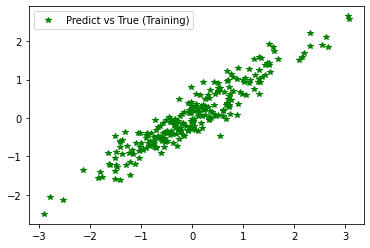

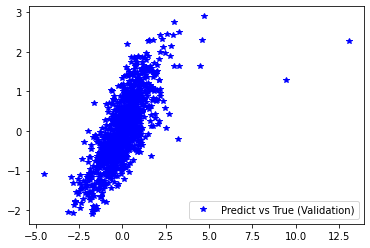

Wall time: 2min 25s


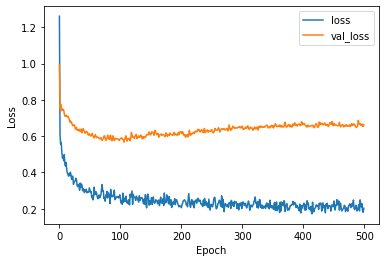

In [54]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 9
np.random.seed(seed) if seed else None

mses = []
corrs = []
for i in range(5):
    # Generate training and validation data
    x_trn, d_trn = regr2(250, 0.4)
    x_val, d_val = regr2(1000, 0.4)

    # Standardization of both inputs and targets
    mu, std = standard(x_trn)
    x_trn = (x_trn - mu)/std
    x_val = (x_val - mu)/std

    mu, std = standard(d_trn)
    d_trn = (d_trn - mu) / std
    d_val = (d_val - mu) / std

    # Define the network, cost function and minimization method
    INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [16],                  
         'drop_nod': 0.1,                
         'act_fun': 'tanh',             
         'out_act_fun': 'linear',      
         'opt_method': 'Adam',         
         'cost_fun': 'mse',           
         'lr_rate': 0.025,
         'metric': 'mse',              
         'lambd' : 0.0,             
         'num_out' : 1 }    

    # Get the model
    model_ex2 = mlp(**INPUT)

    # Print a summary of the model
    # model_ex2.summary()
    
    # Train the model
    estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                      epochs = 500,                     
                      validation_data=(x_val,d_val),
                      batch_size=50,                    
                      verbose = 0)

    # Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
    pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
    pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
    print(f"~~~~~~~~~~{i}~~~~~~~~~~")
    stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
    A,B = stats_reg(d_val, pred_val, 'Validation', estimator_ex2)
    mses.append(B[0])
    corrs.append(B[1])
print("mse", sum(mses)/len(mses))
print("corrs", sum(corrs)/len(corrs))
print(f"({sum(mses)/len(mses)}, {sum(corrs)/len(corrs)})")

# Scatter plots of predicted and true values
plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()


# Training history
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Epoch')
for k in ['loss', 'val_loss']:
    plt.plot(estimator_ex2.history[k], label = k) 
plt.legend(loc='best')

### CellName: Ex3 (#10)
### CellType: Exercise
### Cell instruction: Instruction for question 7-8

For this exercise you are given a classification problem with a fixed training-, validation- and test dataset. The data is the Japanse vowels dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We provide less code here, normalization of the input data and the definition of the MLP is missing. You need to provide that on your own.

#### Question 7
**Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.**

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
This problem is a 9-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

#### Question 8
The typical goal is to have a high accuracy (i.e. the fraction of correctly classified cases). During training we typically monitor possible overtraining by looking at the *loss* of the validation data, since this is the error used during training. One can however have a situation where the loss increases for the validation data but the accuracy stays constant (**why?**). **Given this situation, what would be your criteria to select the best model?** 


7. 

0.89

INPUT = {'inp_dim': x_trn.shape[1],         
    'n_nod': [7],                  
    'drop_nod': 0.0,                
    'act_fun': 'tanh',             
    'out_act_fun': 'softmax',      
    'opt_method': 'Adam',         
    'cost_fun': 'mse',           
    'lr_rate': 0.05,
    'metric': 'mse',              
    'lambd' : 0.001,
    'num_out' : 9   
} 

estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      epochs = 500,     
                      validation_data=(x_val,d_val),
                      batch_size=100,          
                      verbose = 0)      

C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model_301"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 12)]              0         
_________________________________________________________________
dense_734 (Dense)            (None, 7)                 91        
_________________________________________________________________
dropout_433 (Dropout)        (None, 7)                 0         
_________________________________________________________________
dense_735 (Dense)            (None, 9)                 72        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


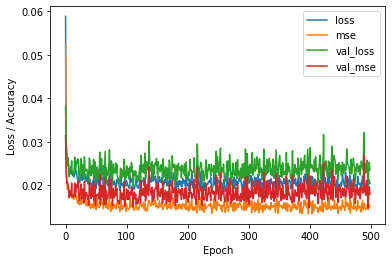


 ########## Result for Training data ########## 

log_loss:    0.2783
accuracy:    0.9160 

              precision    recall  f1-score   support

     class 1       0.95      0.95      0.95       542
     class 2       0.87      0.88      0.88       465
     class 3       0.95      0.90      0.92       424
     class 4       0.88      0.95      0.91       606
     class 5       0.92      0.94      0.93       397
     class 6       0.98      0.99      0.99       523
     class 7       0.99      0.97      0.98       506
     class 8       0.74      0.75      0.75       377
     class 9       0.94      0.86      0.90       434

    accuracy                           0.92      4274
   macro avg       0.91      0.91      0.91      4274
weighted avg       0.92      0.92      0.92      4274



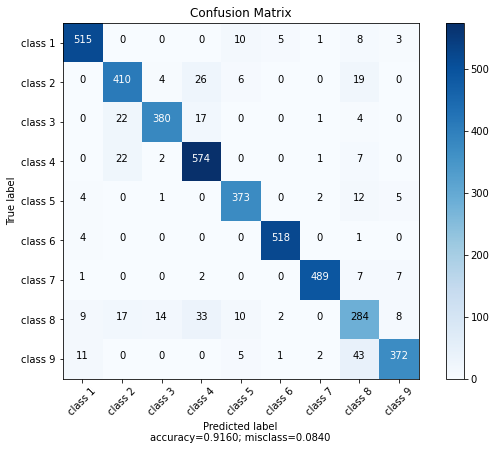


 ########## Result for Validation data ########## 

log_loss:    0.3467
accuracy:    0.8919 

              precision    recall  f1-score   support

     class 1       0.93      0.93      0.93       214
     class 2       0.80      0.85      0.82       203
     class 3       0.95      0.90      0.93       467
     class 4       0.89      0.92      0.91       365
     class 5       0.87      0.87      0.87       158
     class 6       0.93      1.00      0.97       169
     class 7       0.96      0.94      0.95       281
     class 8       0.77      0.75      0.76       264
     class 9       0.86      0.88      0.87       154

    accuracy                           0.89      2275
   macro avg       0.88      0.89      0.89      2275
weighted avg       0.89      0.89      0.89      2275



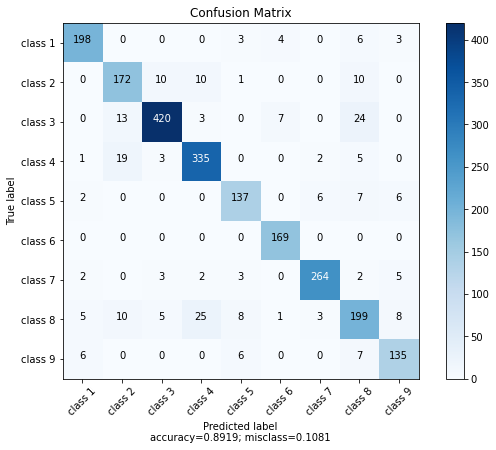

Wall time: 1min 48s


In [171]:
%%time

# Load the data
x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()

# YOUR CODE FOR NORMALIZATION

mu,std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std
x_tst = (x_tst - mu)/std


num_classes = 9

# YOUR CODE THAT DEFINES THE MLP
# INPUT = 
INPUT = {'inp_dim': x_trn.shape[1],         
    'n_nod': [7],                  
    'drop_nod': 0.0,                
    'act_fun': 'tanh',             
    'out_act_fun': 'softmax',      
    'opt_method': 'Adam',         
    'cost_fun': 'mse',           
    'lr_rate': 0.05,
    'metric': 'mse',              
    'lambd' : 0.001,
    'num_out' : 9   
} 

# Get the model
model_vowels = mlp(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      epochs = 500,     
                      validation_data=(x_val,d_val),
                      batch_size=100,          
                      verbose = 0)

# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_vowels.history.keys():
    plt.plot(estimator_vowels.history[k], label = k) 
plt.legend()
plt.show()

# plot the confusion matrix
make_cm_plot(model_vowels, x_trn, d_trn, num_classes, 'Training data')
make_cm_plot(model_vowels, x_val, d_val, num_classes, 'Validation data')

### CellName: Ex4 (#11)
### CellType: Exercise
### Cell instruction: Instruction for question 9

For this exercise you are given a classification problem with a fixed training and test dataset. The data is the Bioconcentraion dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We do not provide any python code for this question, only the small part that reads the data (next code cell).

#### Question 9
**(a) Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.** For this classification task there are not so many cases of class 2. In the training data there is: class 1: 345 cases, class 2: 48 cases, and class 3: 191 cases. One can end upp with situations that the network does not at all learn how to detect cases of class 2. **(b) What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?**  

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
Since there is no defined validation data set you need to split your original training data into training and validation data. You can use *sklearn.model_selection.train_test_split* or *sklearn.model_selection.KFold* to accomplish that, where the latter method does k-fold crossvalidation splits.

**Hint 3:** 
This problem is a 3-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).


In [ ]:
INPUT = {'inp_dim': x_trn.shape[1],         
    'n_nod': [9, 8, 2, 8, 9],                  
    'drop_nod': 0.0,                
    'act_fun': 'tanh',             
    'out_act_fun': 'softmax',      
    'opt_method': 'Adam',         
    'cost_fun': 'mse',           
    'lr_rate': 0.02,
    'metric': 'mse',              
    'lambd' : 0.001,
    'num_out' : 3  
}

model = mlp(**INPUT)

# model.summary()

est = model.fit(x_trn, d_trn,
                   epochs = 600,      
                   validation_data=(x_val, d_val),
                   batch_size=70,
                   verbose = 0)

In [174]:
from sklearn.model_selection import train_test_split

C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(



 ########## Result for Train data ########## 

log_loss:    0.6658
accuracy:    0.7745 

              precision    recall  f1-score   support

     class 1       0.75      0.96      0.84       236
     class 2       0.00      0.00      0.00        31
     class 3       0.84      0.64      0.73       141

    accuracy                           0.77       408
   macro avg       0.53      0.53      0.52       408
weighted avg       0.72      0.77      0.74       408



C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Unde

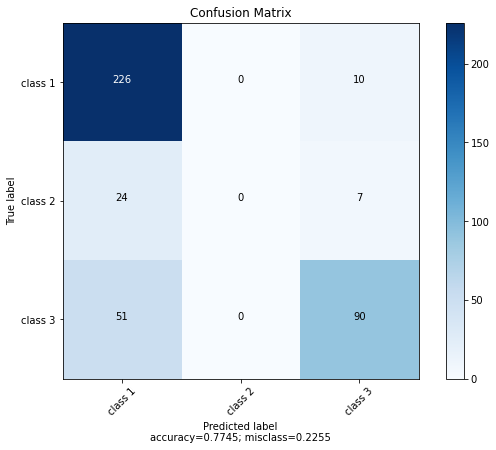


 ########## Result for Validation data ########## 

log_loss:    0.8949
accuracy:    0.6364 

              precision    recall  f1-score   support

     class 1       0.70      0.83      0.76       109
     class 2       0.00      0.00      0.00        17
     class 3       0.46      0.42      0.44        50

    accuracy                           0.64       176
   macro avg       0.39      0.42      0.40       176
weighted avg       0.56      0.64      0.60       176



C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Unde

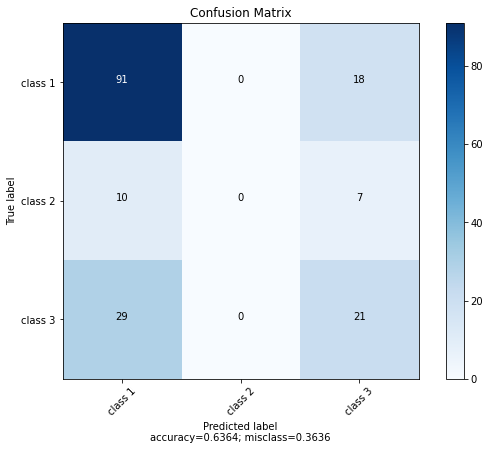


 ########## Result for Test data ########## 

log_loss:    0.9334
accuracy:    0.6513 

              precision    recall  f1-score   support

     class 1       0.67      0.83      0.74       115
     class 2       0.00      0.00      0.00        16
     class 3       0.60      0.48      0.53        64

    accuracy                           0.65       195
   macro avg       0.42      0.44      0.43       195
weighted avg       0.59      0.65      0.61       195



C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joelb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: Unde

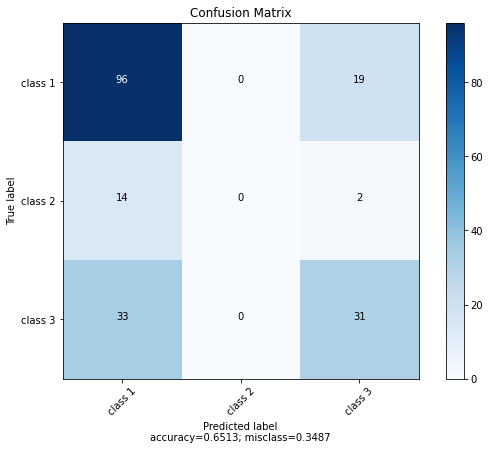

Wall time: 41.7 s


In [41]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 15
np.random.seed(seed) if seed else None

# Load Bioconcentration training and test data
x_trn, d_trn, x_tst, d_tst = bcf()

x_trn, x_val, d_trn, d_val = train_test_split(x_trn, d_trn, test_size=0.3, random_state=41)

# YOUR CODE FOR NORMALIZATION
mu,std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std
x_tst = (x_tst - mu)/std

INPUT = {'inp_dim': x_trn.shape[1],         
    'n_nod': [9, 8, 2, 8, 9],                  
    'drop_nod': 0.0,                
    'act_fun': 'tanh',             
    'out_act_fun': 'softmax',      
    'opt_method': 'Adam',         
    'cost_fun': 'mse',           
    'lr_rate': 0.02,
    'metric': 'mse',              
    'lambd' : 0.001,
    'num_out' : 3  
}

model = mlp(**INPUT)

# model.summary()

est = model.fit(x_trn, d_trn,
                   epochs = 600,      
                   validation_data=(x_val, d_val),
                   batch_size=70,
                   verbose = 0)

make_cm_plot(model, x_trn, d_trn, 3, 'Train data')
make_cm_plot(model, x_val, d_val, 3, 'Validation data')
make_cm_plot(model, x_tst, d_tst, 3, 'Test data')



### CellName: Ex5 (#12)
### CellType: Exercise
### Cell instruction: Instruction for question 10

For this exercise the task is to train a binary classifier for the spiral problem. The aim is to get *zero* classification error for the training data (there is no test or validation data) with as small as possible model, in terms of the number of trainable weights. Also plot the boundary to see if it resembles a spriral. To pass this question you should at least try! The data is randomly generated and I suggest at least 1000 data points to get "good" spirals.

#### Question 10
**Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.**

In [ ]:
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [5],              
         'drop_nod': 0.0,                 
         'act_fun': 'tanh',                 
         'out_act_fun': 'sigmoid',          
         'opt_method': 'Adam',             
         'cost_fun': 'binary_crossentropy', 
         'lr_rate': 0.01,                 
         'num_out' : 1 }                   

# Get the model
model_ex6 = mlp(**INPUT)

# Print a summary of the model
model_ex6.summary()

# Train the model
estimator_ex6 = model_ex6.fit(x_trn, d_trn,
                      epochs = 2000,                
                      batch_size=100,                   
                      verbose = 0)

Model: "model_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_221 (Dense)            (None, 50)                150       
_________________________________________________________________
dropout_149 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_222 (Dense)            (None, 20)                1020      
_________________________________________________________________
dropout_150 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_223 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_151 (Dropout)        (None, 15)                0  

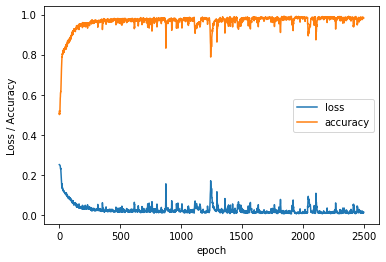

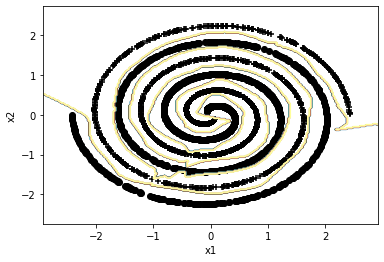

Wall time: 2min 26s


In [50]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None
    
# Generate training data
x_trn, d_trn = twospirals(1500, 3, 0)

mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [50, 20, 15, 1, 15, 20, 50],              
         'drop_nod': 0.01,                 
         'act_fun': 'tanh',                 
         'out_act_fun': 'sigmoid',          
         'opt_method': 'Adam',             
         'cost_fun': 'mse', 
         'lr_rate': 0.01,                 
         'num_out' : 1 }                   

# Get the model
model_ex6 = mlp(**INPUT)

# Print a summary of the model
model_ex6.summary()

# Train the model
estimator_ex6 = model_ex6.fit(x_trn, d_trn,
                      epochs = 2500,                
                      batch_size=100,                   
                      verbose = 0)

# Call the stats function to print out statistics for the training
stats_class(x_trn, d_trn, 'Training', model_ex6)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
for k in estimator_ex6.history.keys():
    plt.plot(estimator_ex6.history[k], label = k) 
plt.legend(loc='best')

# Show the decision boundary
decision_b(x_trn, d_trn, model_ex6)

# The report!

### Name
Joel Bäcker (jo4383ba-s)

### Introduction
During this lab, the goal was to experiment with different hyperparameters in an MLP. The MLP is supposed to solve both classification and regression problems as well as perform model selection to optimize validation performance.

### Answers to questions
1. During the first exercise I got

| Run nr | Validation result|
| :----- | :--------------- |
| 1      | 0.8770           |
| 2      | 0.8690           |
| 3      | 0.8740           |
| 4      | 0.8780           |
| 5      | 0.8710           |
| avg    | 0.8738           |

2.

a) To reach a accuracy of more than 95% the following system was used:

```
'n_nod': [6]
'lr_rate' = 0.1

epochs = 400
bs = 28
```

b) The performance on the validation data set is

| Run nr | Validation result|
| :----- | :--------------  |
| 1      | 0.8320           |
| 2      | 0.8410           |
| 3      | 0.8370           |
| 4      | 0.8200           |
| avg    | 0.8325           |


3. Using the unchanged settings, i.e. same as in 1.

a) Best seems to be 1.

| Hidden nodes | Validation result (average of 5 runs)|
| :----- | :--------------- |
| 1      | 0.8742     |
| 2      | 0.8272     |
| 3      | 0.8368     |
| 4      | 0.8430     |
| 5      | 0.8390     |
| 6      | 0.8240     |
| 7      | 0.8180     |
| 8      | 0.8234     |
| 9      | 0.8216     |
| 10     | 0.8044     |
| 15     | 0.8036     |
| 20     | 0.8130     |
| 25     | 0.8222     |
| 30     | 0.8160     |
| 35     | 0.8102     |

b) The number of nodes in the hidden layer that seems to be the optimal for this exercise is 1. One cause of this is because the data set consists of two overlapping gaussian distributions which means that the boundary between the two is random. When more than 1 node is used the network start to become more and more overstrained and thus worse performance on validation data.

4. The average of 5 runs where new data was generated each iteration is seen in the table below. The best seems to be to use 10 hidden nodes.

| Hidden nodes | Average MSE     | Average corr   |
| :----------- | :-------------- | :------------- |
| 1            | 0.614257 | 0.678314 |
| 2            | 0.569219 | 0.709715 |
| 3            | 0.512025 | 0.739404 |
| 4            | 0.573919 | 0.704057 |
| 5            | 0.512680 | 0.747074 |
| 7            | 0.512990 | 0.741866 |
| 8            | 0.498558 | 0.760870 |
| 9            | 0.543918 | 0.738423 |
| 10           | 0.450265 | 0.779414 |
| 11           | 0.590104 | 0.705842 |
| 12           | 0.521836 | 0.751485 |
| 13           | 0.612119 | 0.710265 |
| 14           | 0.614734 | 0.703953 |
| 15           | 0.632821 | 0.707055 |


5.

a) I used 25 hidden nodes and found that lambda = 0.03 gave a result of 0.45 (MSE) on the validation.

b) The result is about the same as in Q4.

6.

a) Number of hidden nodes were 25 and the best drop out were 0.2. The performance on validation was 0.5219 (MSE).

b) The performance did not become better in regards to Q4/Q5, the opposite happened. If the network had been better than those before, a lower MSE score would be yielded.

7. The optimal model was the one below, it gave a result of about 0.89.

```
'inp_dim': x_trn.shape[1]         
'n_nod': [7]      
'drop_nod': 0.0                
'act_fun': 'tanh'             
'out_act_fun': 'softmax'
'opt_method': 'Adam'      
'cost_fun': 'mse'         
'lr_rate': 0.05
'metric': 'mse'              
'lambd' : 0.001
'num_out' : 9   

epochs = 500,     
batch_size=100,   
```

8. The phenomenon occur because the error is some sort of distance measurement. This implies that the distance can increase away from the correct classification and be falsely classified, i.e. the accuracy do not change but the error does.

If we have this situation I would opt to use early stopping when loss start to increase and validation stays constant. Early stopping allows us to cease the training when the loss have reached a minimum and is increasing again.

9.

a) The optimal MLP were the following. The performance were 0.65.

```
'n_nod': [9, 8, 2, 8, 9]                 
'drop_nod': 0.0          
'act_fun': 'tanh'             
'out_act_fun': 'softmax'
'opt_method': 'Adam'      
'cost_fun': 'mse'         
'lr_rate': 0.02
'metric': 'mse'              
'lambd' : 0.001
'num_out' : 3  

epochs = 600,
batch_size = 70
```

b) The relevant measures to select when finding the optimal model for this problem is accuracy for all the classes as well as the accuracy for the individual classes. By keeping track of them it will be easier to see which changed hyperparameters that made the model's performance better/worse, and in turn keep parameters accordingly.

10. The model used to get a MLP close zero classification error with as small as possible model is the following:

```
'n_nod': [50, 20, 15, 1, 15, 20, 50]
'drop_nod': 0.01
'act_fun': 'tanh',                 
'out_act_fun': 'sigmoid',          
'opt_method': 'Adam',             
'cost_fun': 'mse',
'lr_rate': 0.01,                 
'num_out' : 1

epochs = 2500,                
batch_size=100,
```

Which yielded (same as above):

```
 ########## STATISTICS for Training Data ##########

Accuracy        1.0000
Sensitivity     1.0000
Specificity     1.0000
Loss            0.0001

 ##################################################
```

### Summary
During this lab different methods of finding the optimal model were used. Many of them were based on trial and error, meaning that you change a variable and then seeing if the result became better or worse.

I also had to consider not to overtrain the model so that the model did not train on the notice of the data set.

In the lab data sets with more than two classes were handled, such as the Japanese vowels. This problem required a certain activation and optimization function.